In [76]:
# posibles instalaciones
# pip pyarrow
# pip random

In [9]:
# Ajustar ruta a la raiz del proyecto
import re
import os
if not 'id_0123456789876543210' in locals():
    _rootlevel = 3
    _oldwd = re.sub(r'\\', '/', os.getcwd())
    _spdirs = _oldwd.split('/')
    _newwd = '/'.join(_spdirs[:(len(_spdirs)-_rootlevel)])
    os.chdir(_newwd)
    id_0123456789876543210 = None
print(f'Old WD: {_oldwd}')
print(f'New WD: {_newwd}')

Old WD: d:/Itzco/Documents/GitHub/BTC-LSTM/src/python/jnotes
New WD: d:/Itzco/Documents/GitHub/BTC-LSTM


In [10]:
# importar librerías

from src.python.util.basic import load_arrow
from src.python.util.basic import save_arrow
from src.python.util.stats import histplot
from src.python.util.stats import sample
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Cargar datos

In [11]:
interval = '30m'
file = 'data/02 clean'
name = f'BTCUSDT_{interval}'
data = load_arrow(file, name)
data

,Time,Open,High,Low,Close,Volume,VolumeUSDT,TakerVolume,TakerVolumeUSDT,Trades,Filled
0,25049040.0,4261.48,4280.56,4261.32,4261.45,11.308926,4.822475e+04,3.936174,1.679304e+04,49.0,0.0
1,25049070.0,4280.00,4313.62,4267.99,4308.83,35.872083,1.541414e+05,31.224329,1.341594e+05,122.0,0.0
2,25049100.0,4308.83,4328.69,4304.31,4320.00,21.048648,9.086429e+04,19.396570,8.374608e+04,73.0,0.0
3,25049130.0,4320.00,4320.00,4291.37,4315.32,2.186268,9.440531e+03,2.051501,8.862196e+03,29.0,0.0
4,25049160.0,4330.29,4330.29,4309.37,4311.02,3.566277,1.540976e+04,2.302077,9.951673e+03,14.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
108257,28296750.0,29597.87,29689.99,29380.00,29509.21,3344.028710,9.878180e+07,1563.024040,4.616948e+07,96704.0,0.0
108258,28296780.0,29509.21,29573.92,29467.48,29515.01,1331.443830,3.930424e+07,644.079570,1.901463e+07,52893.0,0.0
108259,28296810.0,29515.01,29665.07,29458.18,29654.64,1413.067910,4.180913e+07,719.883160,2.130574e+07,47378.0,0.0
108260,28296840.0,29654.64,29730.50,29413.31,29524.98,1507.873260,4.457595e+07,682.078110,2.015995e+07,48071.0,0.0


    <<<Revisar>>>

In [31]:
plt.style.use('ggplot') # Me encontré con este estilo se ve bien
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#4C72B0'])

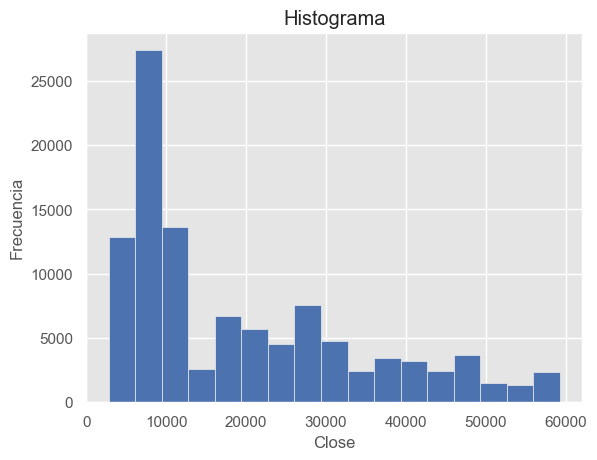

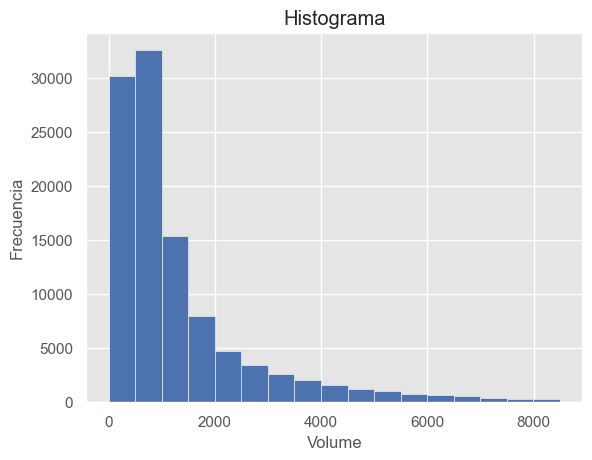

In [32]:
for attribute in ["Close", "Volume"]:
    hist = histplot(data[attribute], level=98) # Histograma con un 98% de confianza
    hist["serie"].hist(bins=hist["bins"])
    plt.xlabel(attribute)
    plt.ylabel('Frecuencia')
    plt.title('Histograma')
    plt.show()

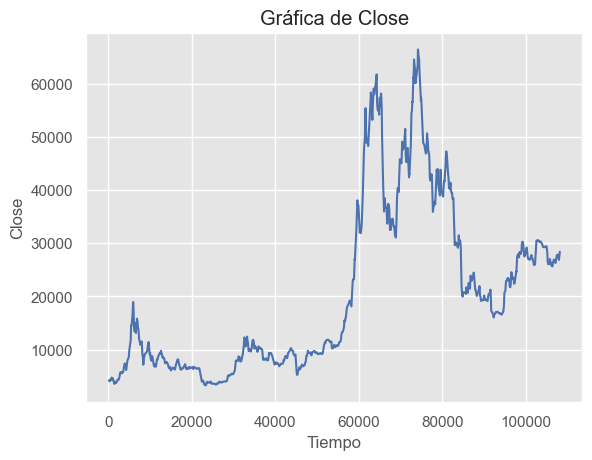

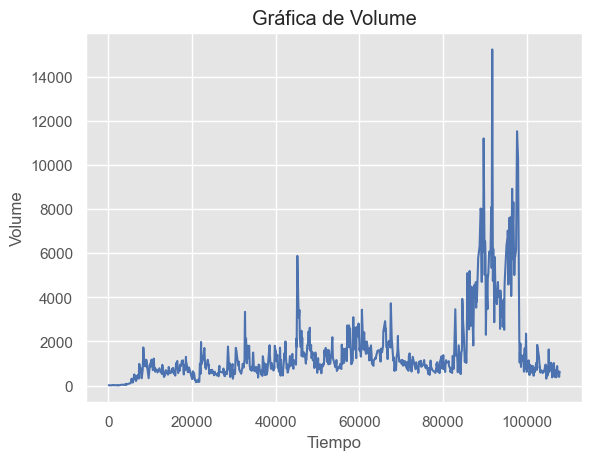

In [28]:
# Gráficar con nivel de muestreo del 1%
for attribute in ["Close", "Volume"]:
    samp = sample(data[attribute], level=1.0)
    # Se pueden graficar samp['serie'], samp['mean'] o samp['std']
    plt.plot(samp['index'], samp['mean'])
    plt.xlabel("Tiempo")
    plt.ylabel(attribute)
    plt.title(f'Gráfica de {attribute}')
    plt.show()

# Rango de valores


* **Open:**	Continuo
* **High:**	Continuo
* **Low:**	Continuo
* **Close:** Continuo
* **Volume:** Continuo
* **VolumeUSD:** Continuo
* **TakerVolume:**	Continuo
* **TakerVolumeUSDT:** Continuo
* **Trades:** Discreto

# Distribución de cada atributo

array([<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'Open'}>,
       <Axes: title={'center': 'High'}>, <Axes: title={'center': 'Low'}>,
       <Axes: title={'center': 'Close'}>,
       <Axes: title={'center': 'Volume'}>,
       <Axes: title={'center': 'VolumeUSDT'}>,
       <Axes: title={'center': 'TakerVolume'}>,
       <Axes: title={'center': 'TakerVolumeUSDT'}>,
       <Axes: title={'center': 'Trades'}>,
       <Axes: title={'center': 'Filled'}>], dtype=object)

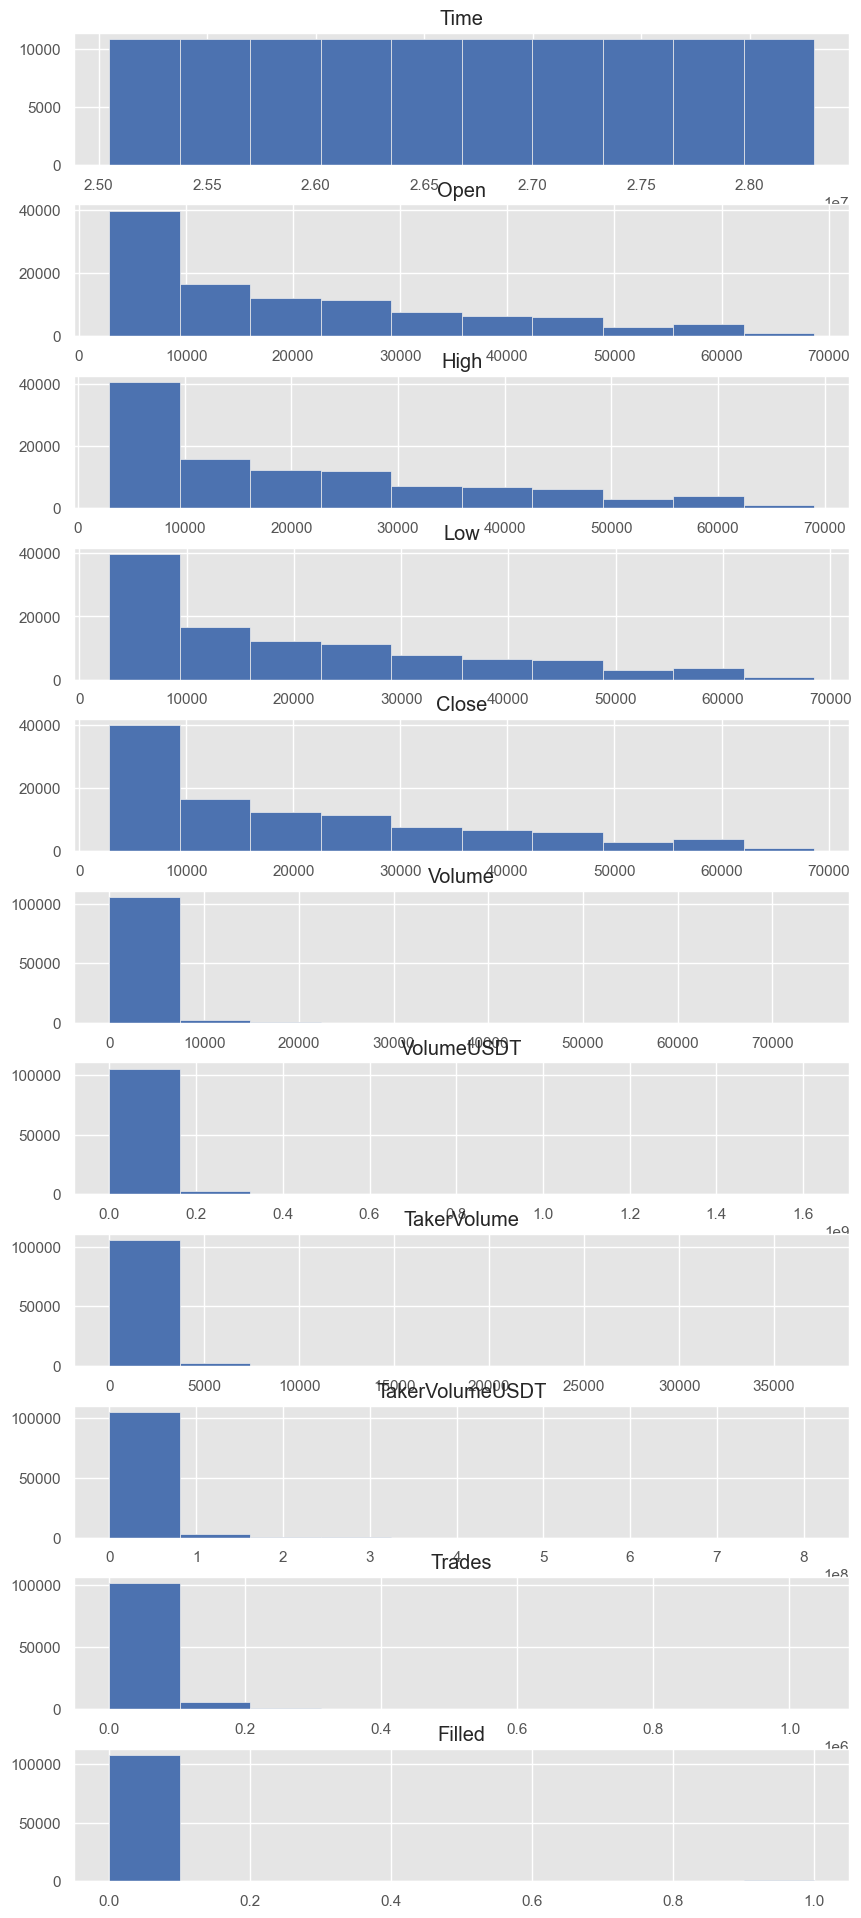

In [29]:
# histograma
nBins = 5
#define format for subplots (1 row and 3 columns)
fig, axis = plt.subplots(len(data.columns), 1, figsize=(10, 24))
#create histogram for each column in DataFrame
data.hist(ax=axis)

* **Open:**	log-normal
* **High:**	log-normal
* **Low:**	log-normal
* **Close:** log-normal
* **Volume:** exponencial
* **VolumeUSD:** exponencial
* **TakerVolume:**	exponencial
* **TakerVolumeUSDT:** exponencial
* **Trades:** exponencial

# Correlación

Notemos que la cantidad de datos obtenidos es abundante, mientras que la cantidad de variables es muy pequeña. Aunque podemos inferir que la correlación de esta variables será alta, mostraremos dicha matriz para una mejor visualización.

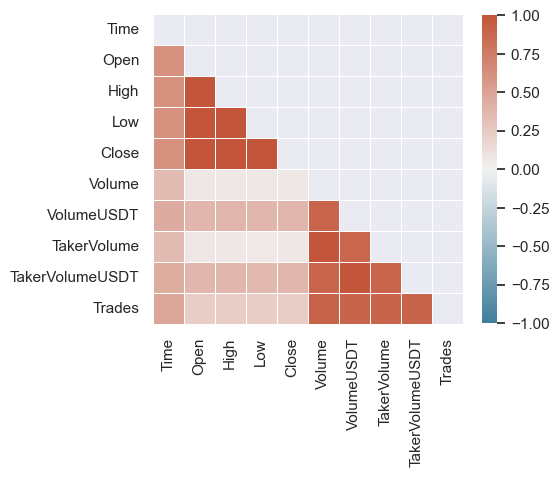

In [30]:
corr = data.drop(data.columns[-1], axis=1).corr()

sns.set_theme(style="dark")
sns.axes_style("darkgrid")

mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(5,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})
plt.show()

# Stationarity

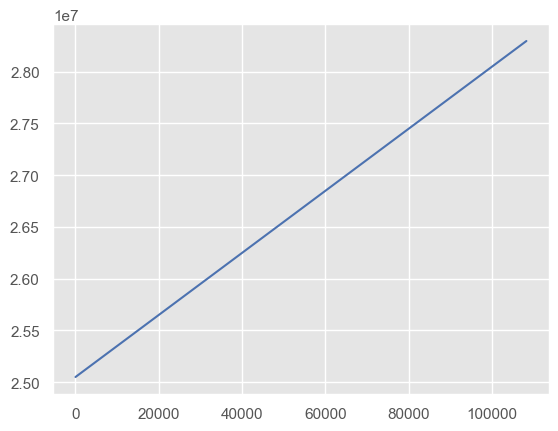

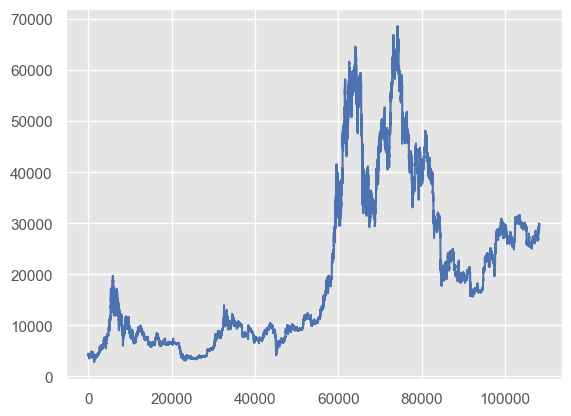

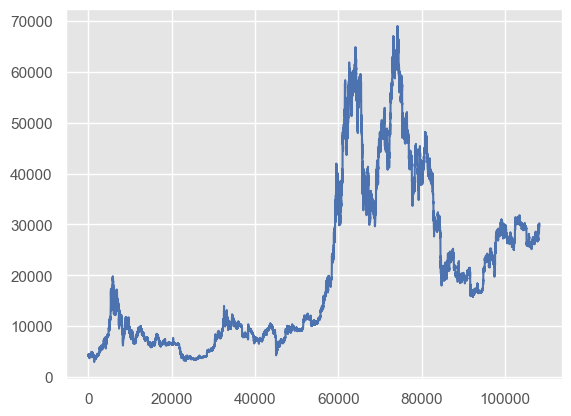

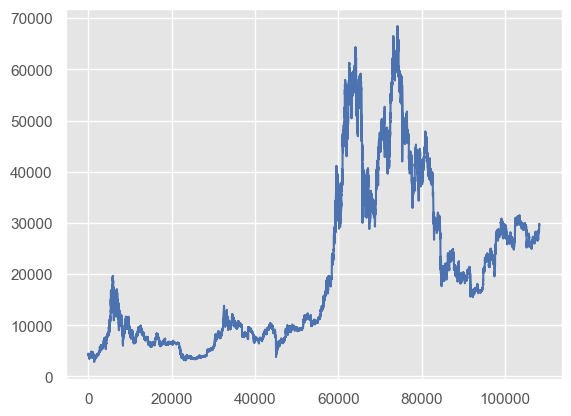

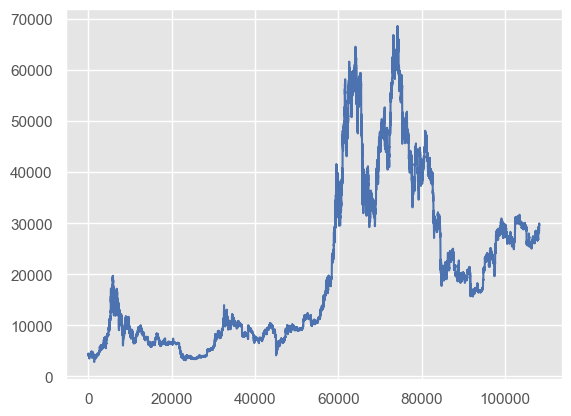

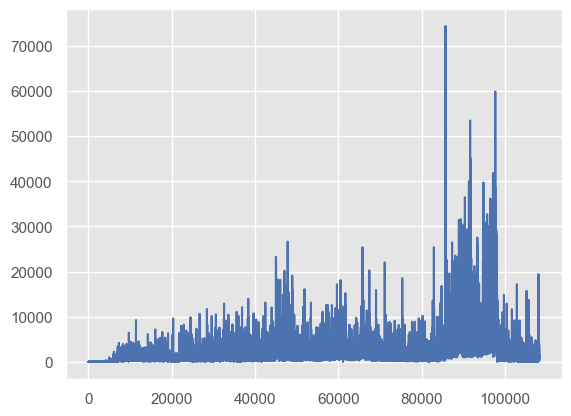

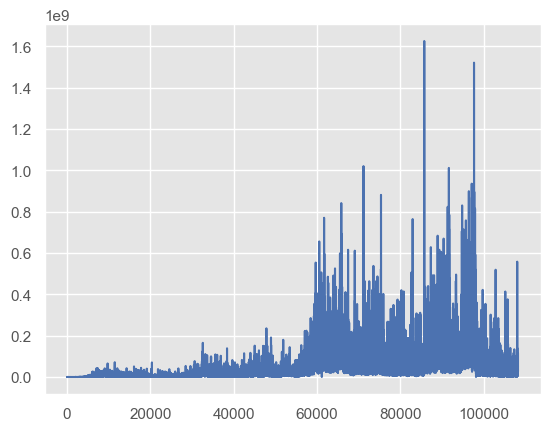

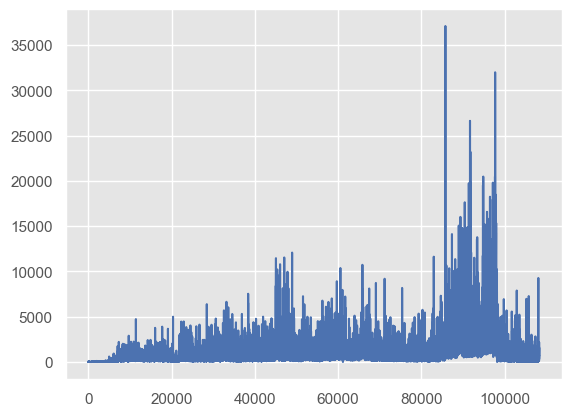

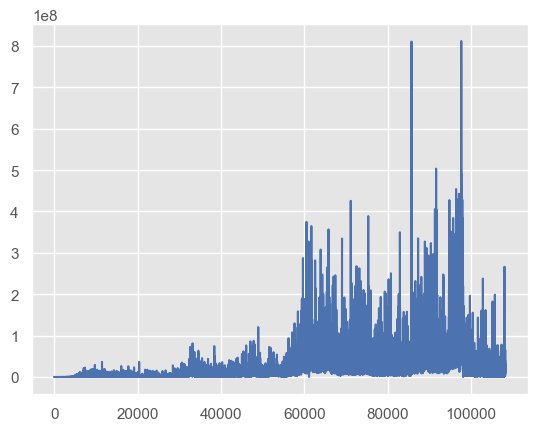

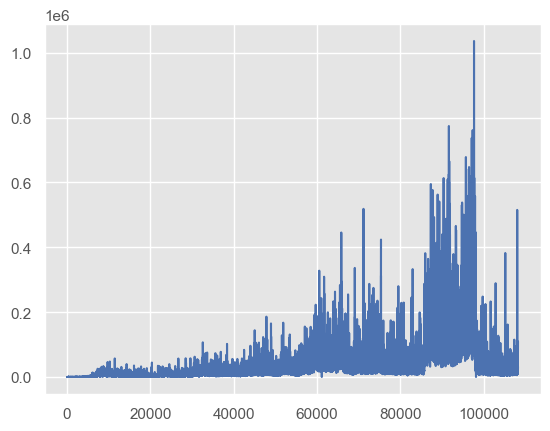

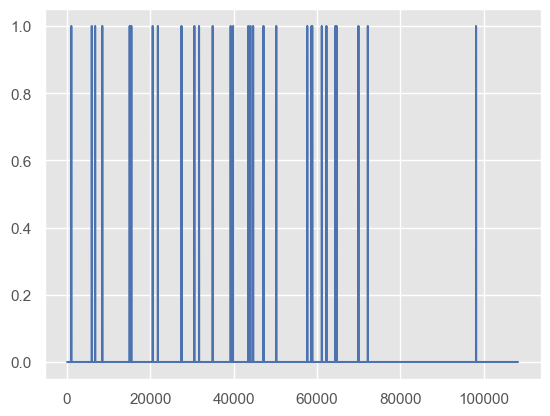

In [34]:
for attribute in data.columns:
    data[attribute].plot()
    plt.show()

# Transformación